In [1]:
from model.model import *
from preprocess import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
session = 12

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


In [3]:
df = spike_preprocess(alldat)

session 0
session 1
session 2
session 3
session 4
session 5
session 6
session 7
session 8
session 9
session 10
session 11
session 12
session 13
session 14
session 15
session 16
session 17
session 18
session 19
session 20
session 21
session 22
session 23
session 24
session 25
session 26
session 27
session 28
session 29
session 30
session 31
session 32
session 33
session 34
session 35
session 36
session 37
session 38
joining dataframes (may take up to a minute)...
done


In [25]:
df['response_time']

0          1.150204
1          1.150204
2          1.150204
3          1.150204
4          1.150204
             ...   
8787221    2.101029
8787222    2.101029
8787223    2.101029
8787224    2.101029
8787225    2.101029
Name: response_time, Length: 8787226, dtype: float64

In [5]:
df[df["code"] == "1_1"]["region"]

157077    VISl
158147    VISl
159217    VISl
160287    VISl
161357    VISl
          ... 
420297    VISl
421367    VISl
422437    VISl
423507    VISl
424577    VISl
Name: region, Length: 251, dtype: object

In [6]:
df["session"].astype(str) + "_" + df["trial"].astype(str) + "_" + df["neuron_num"].astype(str)

0                0_0_0
1                0_0_1
2                0_0_2
3                0_0_3
4                0_0_4
              ...     
8787221    38_342_1343
8787222    38_342_1344
8787223    38_342_1345
8787224    38_342_1346
8787225    38_342_1347
Length: 8787226, dtype: object

In [7]:
vctx= df[df["area"]=="vis_ctx"]

In [8]:
vctx_tr0 = vctx[vctx["trial"]==0]
vctx_se0_tr0 = vctx_tr0[vctx_tr0["session"] == 0]

In [9]:
vctx_se0_tr0

,0,1,2,3,4,5,6,7,8,9,...,response_time,go_cue,feedback_time,feedback_type,contrast_left,contrast_right,mouse_name,neuron_num,area,code
363,0,0,0,0,0,1,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,363,vis_ctx,0_363
364,0,0,0,0,0,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,364,vis_ctx,0_364
365,0,0,0,0,1,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,365,vis_ctx,0_365
368,0,0,0,0,0,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,368,vis_ctx,0_368
369,0,0,0,0,0,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,369,vis_ctx,0_369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,0,0,0,0,0,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,717,vis_ctx,0_717
720,0,0,0,0,0,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,720,vis_ctx,0_720
721,0,0,0,0,0,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,721,vis_ctx,0_721
725,0,0,0,0,0,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,725,vis_ctx,0_725


In [10]:
np.unique(df.area)

array(['basal_ganglia', 'cortical_subplate', 'hipp', 'midbrain', 'other',
       'other_ctx', 'thal', 'vis_ctx'], dtype=object)

In [11]:
n_t = 10
trials = np.arange(n_t);
aca= df[df["region"]=="ACA"];
aca = aca[aca["session"] == 0]
rows = np.ceil(np.sqrt(n_t))
print(rows)

4.0


In [12]:
aca['sum_spikes'] = np.sum((aca.iloc[:, :250] > 0).to_numpy(),axis=1)
aca = aca.sort_values('sum_spikes')
aca

,0,1,2,3,4,5,6,7,8,9,...,go_cue,feedback_time,feedback_type,contrast_left,contrast_right,mouse_name,neuron_num,area,code,sum_spikes
0,0,0,0,0,0,0,0,0,0,0,...,1.027216,1.186819,1.0,1.00,0.0,Cori,0,other_ctx,0_0,0
84515,0,0,0,0,0,0,0,0,0,0,...,0.845213,2.382838,1.0,0.00,0.0,Cori,105,other_ctx,0_105,0
84516,0,0,0,0,0,0,0,0,0,0,...,0.845213,2.382838,1.0,0.00,0.0,Cori,106,other_ctx,0_106,0
84525,0,0,0,0,0,0,0,0,0,0,...,0.845213,2.382838,1.0,0.00,0.0,Cori,115,other_ctx,0_115,0
84527,0,0,0,0,0,0,0,0,0,0,...,0.845213,2.382838,1.0,0.00,0.0,Cori,117,other_ctx,0_117,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154415,0,1,0,0,0,0,1,0,0,1,...,0.491208,1.230819,-1.0,0.25,1.0,Cori,275,other_ctx,0_275,80
72207,0,0,2,0,0,1,0,0,0,0,...,0.642810,1.040416,-1.0,0.25,1.0,Cori,275,other_ctx,0_275,82
275,0,0,0,1,0,0,0,0,0,0,...,1.027216,1.186819,1.0,1.00,0.0,Cori,275,other_ctx,0_275,86
78079,0,0,0,0,0,1,0,1,0,1,...,0.927215,1.604825,1.0,0.00,1.0,Cori,275,other_ctx,0_275,88


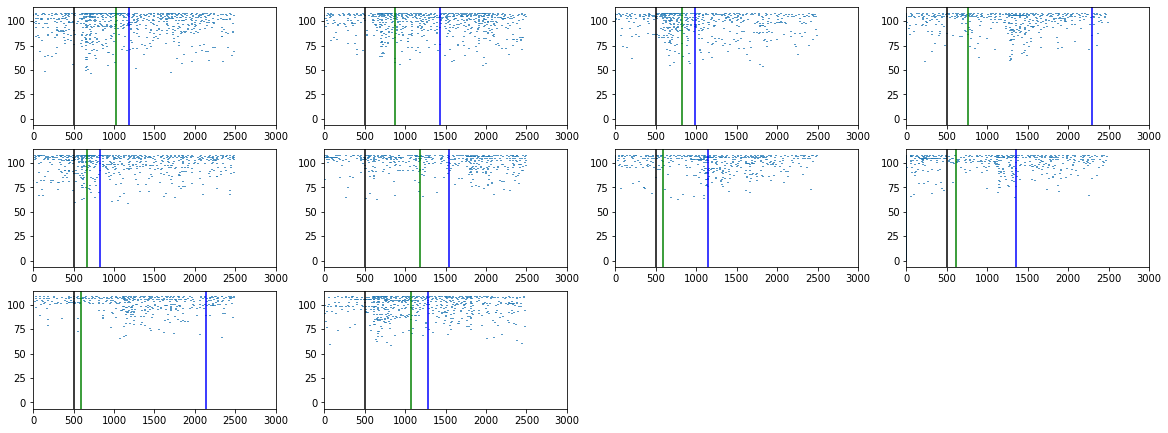

In [13]:
plt.figure(1,figsize=(20,10));
for i,trial in enumerate(trials):
    aca_t = aca[aca["trial"]==trial]
    plt.subplot(rows,rows,i+1)
    plt.eventplot(((aca_t.iloc[:, :250] > 0).to_numpy() * np.arange(1, 251) - 1)*10)
    plt.axvline(x=500,color='black')
    plt.axvline(x=np.unique(aca_t.go_cue)*1000,color='green')
    plt.axvline(x=np.unique(aca_t.feedback_time)*1000,color='blue')
    plt.xlim([0, 3000])

(0, 3000)

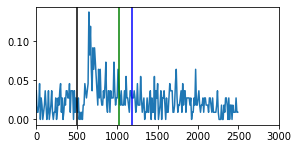

In [59]:
plt.figure(1,figsize=(20,10));

trial = 0
aca_t = aca[aca["trial"]==trial]
plt.subplot(rows,rows,i+1)
plt.plot(np.arange(250)*10,np.mean(aca_t.iloc[:, :250]))
plt.axvline(x=500,color='black')
plt.axvline(x=np.unique(aca_t.go_cue)*1000,color='green')
plt.axvline(x=np.unique(aca_t.feedback_time)*1000,color='blue')
plt.xlim([0, 3000])

In [170]:
def in_bin(time,bin_size):
    which_bin = np.floor(time/bin_size);
    return which_bin

aca['center'] = in_bin(df['feedback_time']*1000,10)
# aca['center'] = in_bin(df['go_cue']*1000,10)




In [171]:
max_add_len = np.max(aca.center.values)
min_add_len = np.min(aca.center.values)

272.0
272.0


(23326, 522)

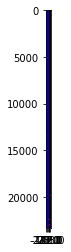

In [176]:
vals = aca.iloc[:, :250].values
center_vals = aca['center'].values
sh = vals.shape
centered_array = np.zeros([sh[0],int(sh[1] + max_add_len)])
for n in np.arange(sh[0]):
    start = int(center_vals[n])
    end = int(center_vals[n] + sh[1])
    centered_array[n,start:end] = vals[n]

plt.imshow(centered_array, cmap='hot')
locs, labels=plt.xticks()
new_locs = locs[1:-1]
x_ticks = new_locs-max_add_len
plt.xticks(new_locs,x_ticks, horizontalalignment='center')

zero = new_locs[2] + ((new_locs[3]-new_locs[2]) * ((-x_ticks[2])/(x_ticks[3]-x_ticks[2])))
plt.axvline(x=zero,color='blue')

centered_array.shape

In [ ]:
np.zeros()